In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from fastai.text.all import *

path = "/content/drive/My Drive/DATA-475/imdb"

In [4]:
import pandas as pd
df = pd.read_csv(f"{path}/train.csv")
df

,review,sentiment
0,"Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as ""Teachers"". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is ""Teachers"". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... ...",positive
1,"Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything from going to school, work, or vote for the matter. Most people think of the homeless as just a lost cause while worrying about things such as racism, the war on Iraq, pressuring kids to succeed, technology, the elections, inflation, or worrying if they'll be next to end up on the streets.But what if you were given a bet to live on the streets for a month without the luxuries you once had from a home, the enterta...",positive
2,"Brilliant over-acting by Lesley Ann Warren. Best dramatic hobo lady I have ever seen, and love scenes in clothes warehouse are second to none. The corn on face is a classic, as good as anything in Blazing Saddles. The take on lawyers is also superb. After being accused of being a turncoat, selling out his boss, and being dishonest the lawyer of Pepto Bolt shrugs indifferently ""I'm a lawyer"" he says. Three funny words. Jeffrey Tambor, a favorite from the later Larry Sanders show, is fantastic here too as a mad millionaire who wants to crush the ghetto. His character is more malevolent than ...",positive
3,"This is easily the most underrated film inn the Brooks cannon. Sure, its flawed. It does not give a realistic view of homelessness (unlike, say, how Citizen Kane gave a realistic view of lounge singers, or Titanic gave a realistic view of Italians YOU IDIOTS). Many of the jokes fall flat. But still, this film is very lovable in a way many comedies are not, and to pull that off in a story about some of the most traditionally reviled members of society is truly impressive. Its not The Fisher King, but its not crap, either. My only complaint is that Brooks should have cast someone else in the...",positive
4,"This is not the typical Mel Brooks film. It was much less slapstick than most of his movies and actually had a plot that was followable. Leslie Ann Warren made the movie, she is such a fantastic, under-rated actress. There were some moments that could have been fleshed out a bit more, and some scenes that could probably have been cut to make the room to do so, but all in all, this is worth the price to rent and see it. The acting was good overall, Brooks himself did a good job without his characteristic speaking to directly to the audience. Again, Warren was the best actor in the movie, bu...",positive
...,...,...
24995,"Towards the end of the movie, I felt it was too technical. I felt like I was in a classroom watching how our Navy performs rescues at sea. I liked seeing that the engines have fire extinguishers. I guess I should have figured that out before, but I never thought about it. Using a 747 to transport valuable old paintings with very little security is odd and not realistic. The acting was pretty good, since they're mostly seasoned professionals, but if you're going to stretch so far from what would most likely happen, it should be more like a fantasy, comical, etc. Everything was taken too ser...",negative
24996,"This is the kind of movie that my enemies content I watch all the time, but it's not bloody true. I only watch it once in a while to make sure that it's as bad as I first thought it was.Some kind of mobsters hijack a Boeing 747. (That, at least, is an improvement over having

In [5]:
# create TextLMDataBunch using the csv in path
#     remember to specify the text column
data_lm = TextDataLoaders.from_df(
    df,
    text_col="review",
    label_col="sentiment",
    is_lm=True,
    bs=32
)

In [6]:
# create language model learner with AWD_LSTM architecture and drop_mult of 0.5
lm_learner = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=.5)

SuggestedLRs(valley=0.0020892962347716093)

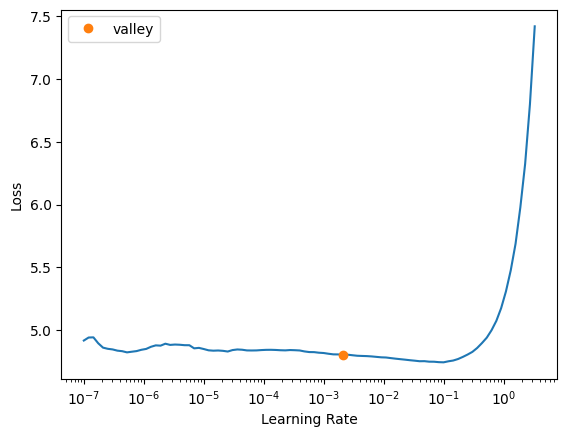

In [7]:
# find a learing rate
lm_learner.lr_find()


In [8]:
# fit one cycle
lr = lm_learner.recorder.lr
lm_learner.fit_one_cycle(2, lr)

epoch,train_loss,valid_loss,time
0,4.298739,4.161066,09:35
1,4.250731,4.125150,09:46


In [9]:
# save the encoder
lm_learner.save_encoder("model")

In [10]:
lm_learner.predict("this movie talks about Canadian", n_words=20)

'this movie talks about Canadian selling suplexes and the war money shelters . Mouthpiece interpreted this as a rule in this nation about the'

In [11]:
df = pd.read_csv(f"{path}/test.csv")
df

,review,sentiment
0,"I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism. The sign of a good movie is that it can toy with our emotions. This one did exactly that. The entire theater (which was sold out) was overcome by laughter during the first half of the movie, and were moved to tears during the second half. While exiting the theat...",positive
1,"Actor turned director Bill Paxton follows up his promising debut, the Gothic-horror ""Frailty"", with this family friendly sports drama about the 1913 U.S. Open where a young American caddy rises from his humble background to play against his Bristish idol in what was dubbed as ""The Greatest Game Ever Played."" I'm no fan of golf, and these scrappy underdog sports flicks are a dime a dozen (most recently done to grand effect with ""Miracle"" and ""Cinderella Man""), but some how this film was enthralling all the same.The film starts with some creative opening credits (imagine a Disneyfied version...",positive
2,"As a recreational golfer with some knowledge of the sport's history, I was pleased with Disney's sensitivity to the issues of class in golf in the early twentieth century. The movie depicted well the psychological battles that Harry Vardon fought within himself, from his childhood trauma of being evicted to his own inability to break that glass ceiling that prevents him from being accepted as an equal in English golf society. Likewise, the young Ouimet goes through his own class struggles, being a mere caddie in the eyes of the upper crust Americans who scoff at his attempts to rise above ...",positive
3,"I saw this film in a sneak preview, and it is delightful. The cinematography is unusually creative, the acting is good, and the story is fabulous. If this movie does not do well, it won't be because it doesn't deserve to. Before this film, I didn't realize how charming Shia Lebouf could be. He does a marvelous, self-contained, job as the lead. There's something incredibly sweet about him, and it makes the movie even better. The other actors do a good job as well, and the film contains moments of really high suspense, more than one might expect from a movie about golf. Sports movies are a d...",positive
4,"Bill Paxton has taken the true story of the 1913 US golf open and made a film that is about much more than an extra-ordinary game of golf. The film also deals directly with the class tensions of the early twentieth century and touches upon the profound anti-Catholic prejudices of both the British and American establishments. But at heart the film is about that perennial favourite of triumph against the odds.The acting is exemplary throughout. Stephen Dillane is excellent as usual, but the revelation of the movie is Shia LaBoeuf who delivers a disciplined, dignified and highly sympathetic p...",positive
...,...,...
24995,"I occasionally let my kids watch this garbage so they will understand just how pathetic the show's ""contestants"" are. They are pathetic not because they are fat, but because they whore their dignity for a few minutes of fame and fortune.For anyone to appear on National TV and blubber, sniffle, and whine about being fat (entirely their own fault) is nauseating. What does this say about us as a nation? Does it suggest that your lifestyle choices, and the consequences of them, aren't our responsibility? ""The Biggest Loser"" is an appropriate title, but it has nothing to do with one's weight.Ab...",negative
24996,When all we have anymore is pretty much reality TV shows with people making fools of themselves for whatever reason be it too fat or can't sing or cook worth a damn than I know Hollywood has run out of original ideas. I can not recall a time when anything original or in

In [12]:
# create TextClasDataBunch using the csv in path
#     remember to specify the text/label column
#     specify test dataset, vocab, and bs

data_clas = TextDataLoaders.from_df(
    df,
    text_col="review",
    label_col="sentiment",
    text_vocab=data_lm.train_ds.vocab,
    bs=32,
)
clas_learner = text_classifier_learner(data_clas, arch=AWD_LSTM, drop_mult=0.5)
clas_learner.load_encoder("model")

SuggestedLRs(valley=0.00363078061491251)

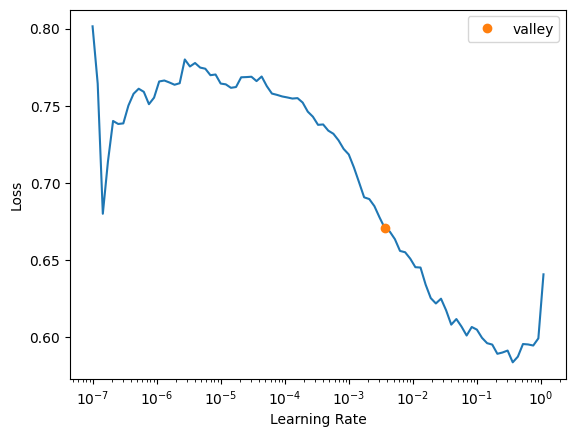

In [13]:
# tune the text_classifier_learner to accpetable accuracy (>80%)
clas_learner.lr_find()


In [14]:
lr = clas_learner.recorder.lr
clas_learner.fit_one_cycle(1, lr)

epoch,train_loss,valid_loss,time
0,0.405704,0.342280,02:16


In [15]:
clas_learner.predict("This is a great movie,")

('positive', tensor(1), tensor([1.1268e-04, 9.9989e-01]))

In [16]:
import pandas as pd


df = pd.read_csv(path+"/test.csv")
y_true = tensor(df["sentiment"]=="positive")

In [17]:
y_true

tensor([ True,  True,  True,  ..., False, False, False])

In [18]:
interp = ClassificationInterpretation.from_learner(
    clas_learner,

)


In [19]:
interp.most_confused(min_val=2)

[('negative', 'positive', 393), ('positive', 'negative', 343)]

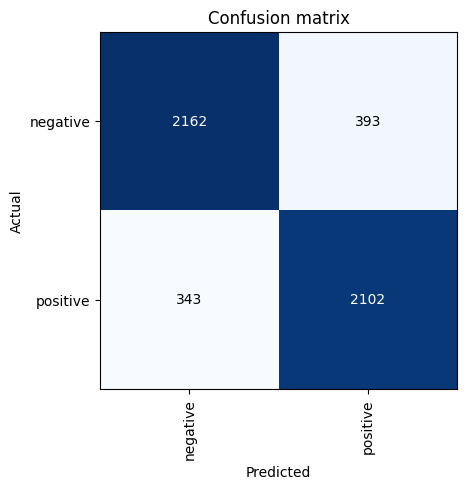

In [20]:
interp.plot_confusion_matrix()